In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
df = pd.read_csv("/content/train_dataset.csv")
df.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,0,1,0,6,992868,992744,-1,0
1,2,209,20671,6316631,274,96,0,0,0,0,...,183877,6303353,183877,1,0,8,90551,90494,-1,3
2,4,150,19774,6475473,3054,166,0,0,0,0,...,502,6439888,502,1,0,6,7516,7418,-1,2
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,0,1,0,8,664849,664714,-1,0
4,3,990,104058,88896,778,792,0,0,0,0,...,715,7152,715,1,0,5,4328,4201,-1,1


In [9]:
df.dtypes

,0
Port Number,int64
Received Packets,int64
Received Bytes,int64
Sent Bytes,int64
Sent Packets,int64
Port alive Duration (S),int64
Packets Rx Dropped,int64
Packets Tx Dropped,int64
Packets Rx Errors,int64
Packets Tx Errors,int64


In [88]:
df.columns

Index(['Port Number', 'Received Packets', 'Received Bytes', 'Sent Bytes',
       'Sent Packets', 'Port alive Duration (S)', 'Packets Rx Dropped',
       'Packets Tx Dropped', 'Packets Rx Errors', 'Packets Tx Errors',
       'Delta Received Packets', 'Delta Received Bytes', 'Delta Sent Bytes',
       'Delta Sent Packets', 'Delta Port alive Duration (S)',
       'Delta Packets Rx Dropped', ' Delta Packets Tx Dropped',
       'Delta Packets Rx Errors', 'Delta Packets Tx Errors',
       'Connection Point', 'Total Load/Rate', 'Total Load/Latest',
       'Unknown Load/Rate', 'Unknown Load/Latest', 'Latest bytes counter',
       'is_valid', 'Table ID', 'Active Flow Entries', 'Packets Looked Up',
       'Packets Matched', 'Max Size', 'Label'],
      dtype='object')

In [12]:
for i in columns:
  print(df[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


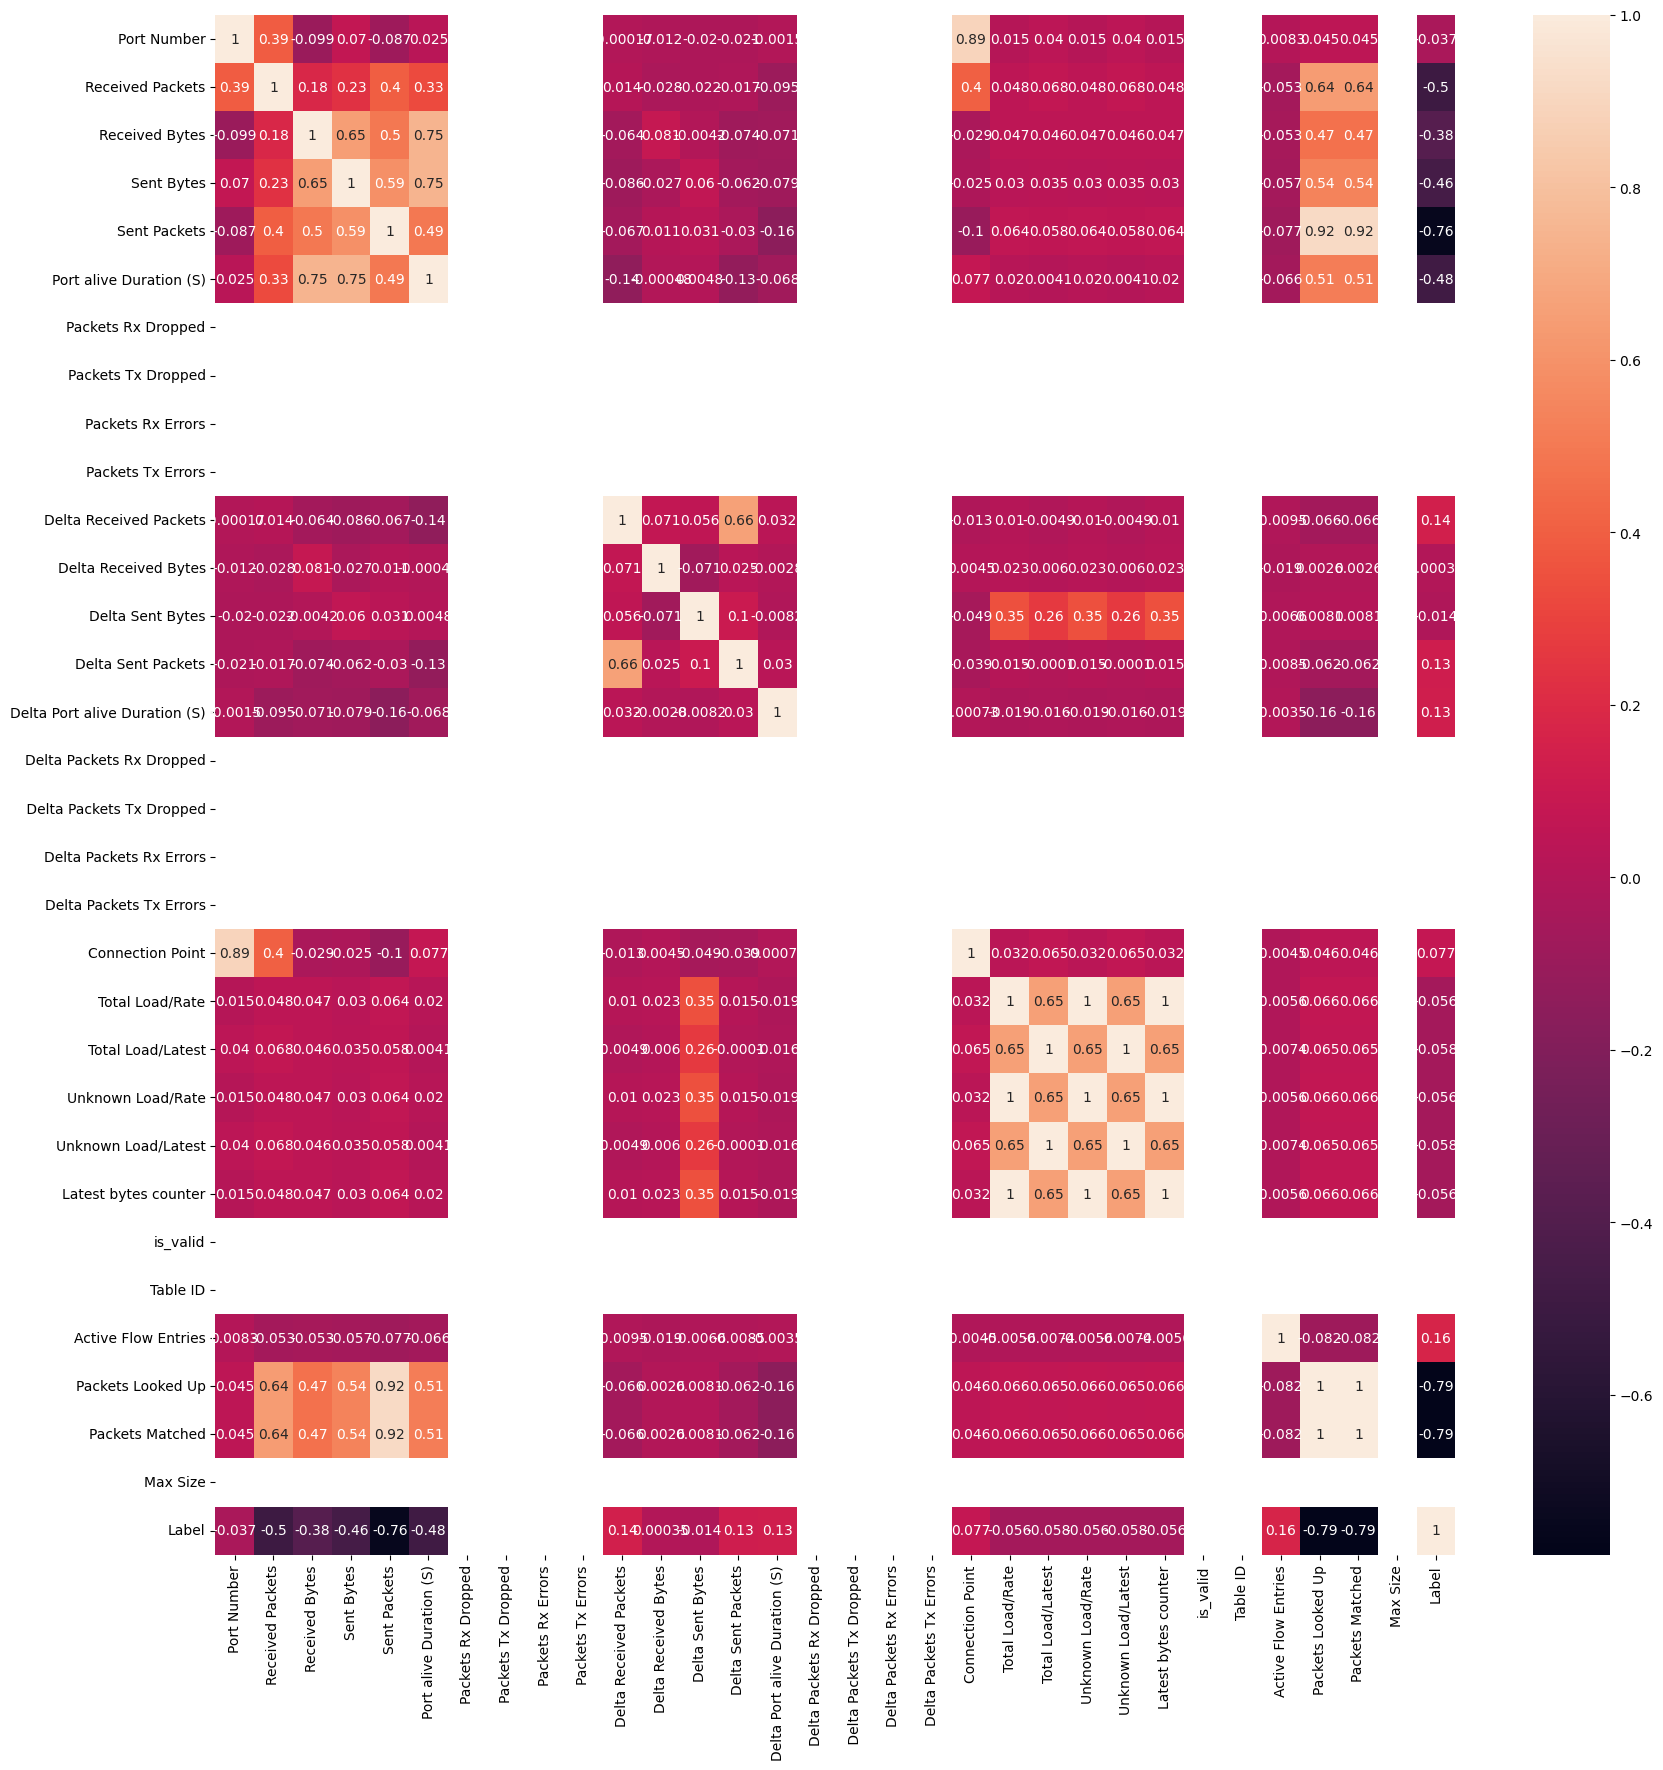

In [19]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [79]:
X = df.iloc[:, :-1]
y = df["Label"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion = "gini")
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [86]:
print(accuracy_score(y_test, yhat))
print()
print(classification_report(y_test, yhat))

0.946

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       540
           1       0.92      0.95      0.93       112
           2       0.82      0.91      0.86       125
           3       0.88      0.91      0.90       142
           4       0.96      0.86      0.91        63
           5       0.75      0.17      0.27        18

    accuracy                           0.95      1000
   macro avg       0.89      0.80      0.81      1000
weighted avg       0.95      0.95      0.94      1000

